# Image to ASCII Conversion

We can use Python to manipulate images

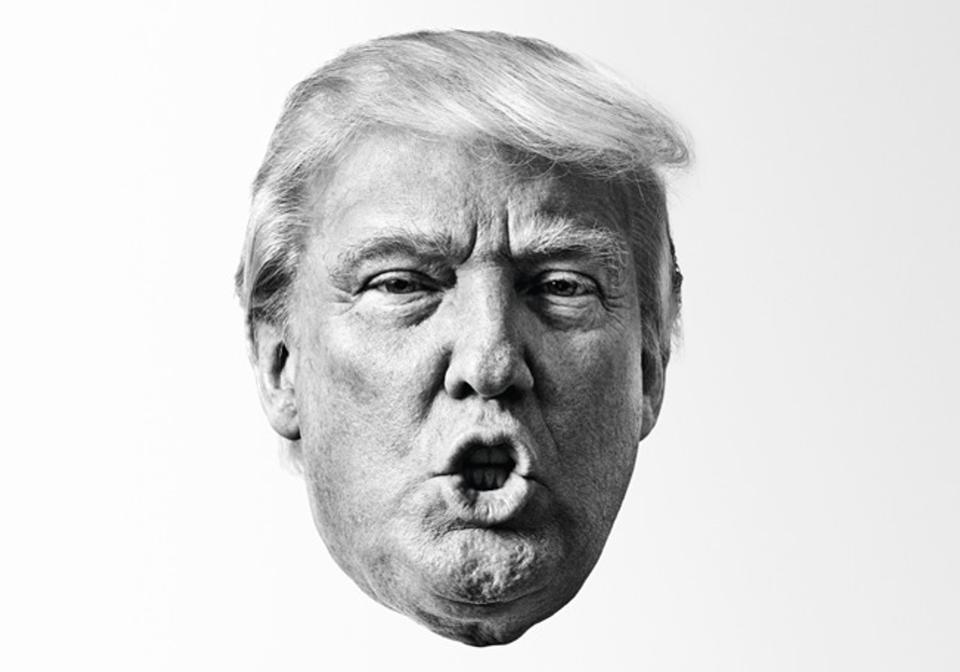

In [5]:
import numpy as np
from PIL import Image
from ipywidgets import interact

Image.open("t_d.jpg")

_A truly great face. The best face. Believe me._

A black and white image like this can be expressed as a matrix (grid) of brightness values between 0 (black) and 255 (white). Numpy is a Python library that is designed to handle these matrices efficiently. Let's see what the computer sees...

In [3]:
img = np.array(Image.open("t_d.jpg").convert('L'))

# Print the first 2 rows of pixel values
print(img[:2])

[[253 253 253 ... 229 229 229]
 [253 253 253 ... 229 229 229]]


This represents the photo as a 2-dimensional array (a list of lists) of brightness values. Because the first few rows of pixels are a subtle gradient from white to slightly less white, most of the values you see here are near 255.

__Note:__ you may be curious what the `.convert('L')` bit is about. Even though the original image is in black and white, we need to ensure each pixel stores a single luminance value instead of a triplet of values for red, green, and blue.

If we take a look at the middle of the image, you'll see more variation in the pixels. Here are the L-values (think brightness) of the 301st row:

In [7]:
# Remember: counting in python starts at zero, so img[300] gives us the 301st row!
img[300]

array([253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,
       253, 252, 252, 252, 252, 252, 252, 252, 252, 251, 251, 251, 252,
       252, 253, 253, 253, 253, 253, 253, 252, 252, 251, 251, 251, 252,
       252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 252, 25

In [8]:
# Turns our array into an image. In this case, we get the 301st row of pixels.
Image.fromarray(img[300:301])

Now for the fun part. We can see that the computer can represent the "grayness" of each pixel as a number between 0 and 255. What if we could substitute characters for colors? 

Some characters are more dense than others -- for example, # is darker than $, which is in turn darker than +. While there are many ways to characterize the 'darkness' of a character, we can try to eyeball it.

From light to dark, the "palette" we'll use is:
`" .:=+*o8%@"`

This gives us 10 shades of gray to work with, but if we find that isn't enough, we can always add more.

In order to map each character to a specific shade of gray, we'll need to reduce the number of colors in the image. The Image module has a method that does exactly that. 

Let's see what POTUS looks like with a 10-color gray palette.

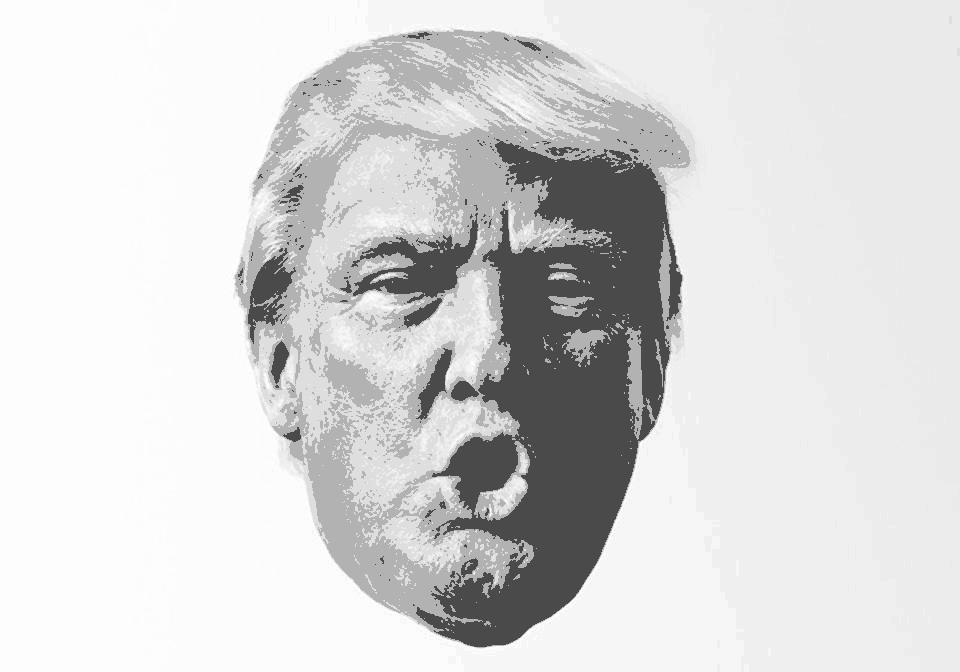

In [7]:
Image.fromarray(img).quantize(colors=10)

Still recognizable! So... here's everything we've done so far, but in a function. You can copy/paste this cell into your IDE to get started.

In [4]:
import numpy as np
from PIL import Image

def decolorize(filename, n):
    """ Takes an image as input, converts it to monochrome, 
    and reduces the number of shades to n. Returns a numpy array
    representing the image as output.
    """
    img = Image.open('t_d.jpg').convert('L').quantize(colors=n)
    return np.array(img)

decolorize('t_d.jpg', 10)

array([[1, 1, 1, ..., 6, 6, 6],
       [1, 1, 1, ..., 6, 6, 6],
       [1, 1, 1, ..., 6, 6, 6],
       ...,
       [1, 1, 1, ..., 5, 5, 5],
       [1, 1, 1, ..., 5, 5, 5],
       [1, 1, 1, ..., 5, 5, 5]], dtype=uint8)